# IMPALA Results

In [233]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [234]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [235]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[1]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200724-103742
Map name:  MoveToBeacon
Batch size:  22
Total steps:  6000 

Matchig xpid:  torchbeast-20200724-160238
Map name:  MoveToBeacon
Batch size:  22
Total steps:  30000 

Matchig xpid:  torchbeast-20200724-164219
Map name:  MoveToBeacon
Batch size:  24
Total steps:  6000 

Matchig xpid:  torchbeast-20200724-165751
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200724-203021
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200725-122210
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200725-152321
Map name:  MoveToBeacon
Batch size:  12
Total steps:  60000 

Matchig xpid:  torchbeast-20200727-130923
Map name:  MoveToBeacon
Batch size:  24
Total steps:  6000 

Matchig xpid:  torchbeast-20200727-211031
Map name:  MoveToBeacon
Batch size:  24
Total steps:  120000 

Matchig xpid:  torchbeast-20200728-103239
Map name:  MoveToBeacon


['torchbeast-20200724-103742',
 'torchbeast-20200724-160238',
 'torchbeast-20200724-164219',
 'torchbeast-20200724-165751',
 'torchbeast-20200724-203021',
 'torchbeast-20200725-122210',
 'torchbeast-20200725-152321',
 'torchbeast-20200727-130923',
 'torchbeast-20200727-211031',
 'torchbeast-20200728-103239',
 'torchbeast-20200728-121644',
 'torchbeast-20200730-175837',
 'torchbeast-20200728-170314',
 'torchbeast-20200731-102017',
 'torchbeast-20200730-111813',
 'torchbeast-20200730-115137',
 'torchbeast-20200730-120912',
 'torchbeast-20200730-123206',
 'torchbeast-20200730-153737',
 'torchbeast-20200731-154811',
 'torchbeast-20200730-164539',
 'torchbeast-20200731-170455',
 'torchbeast-20200731-182325',
 'torchbeast-20200731-182205',
 'torchbeast-20200731-183125',
 'torchbeast-20200731-183523']

In [236]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200731"
hms = "183523"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [237]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  24
Total steps:  120000
Learning rate:  0.0007
Entropy cost:  0.0005


## Loading logs

In [238]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [239]:
logs = logs[logs['mean_episode_return'].notna()]

In [240]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.596210e+09,0,1387.690918,2.000000,1365.805298,22.131369,-0.245765
1,1,1.596210e+09,80,-10019.279297,0.727273,-10288.468750,269.437500,-0.247818
2,2,1.596210e+09,160,1253.029053,1.090909,1227.366455,25.905605,-0.243056
3,3,1.596210e+09,240,-3249.632812,0.000000,-3293.141602,43.753563,-0.244944
4,4,1.596210e+09,320,2598.478271,1.636364,2529.329590,69.389603,-0.241024
...,...,...,...,...,...,...,...,...
1493,1493,1.596214e+09,119440,96.436684,26.000000,-172.406433,268.843933,-0.000816
1495,1495,1.596214e+09,119600,-729.629639,26.000000,-880.732910,151.104126,-0.000826
1496,1496,1.596214e+09,119680,-185.611374,25.416668,-356.836792,171.226227,-0.000808
1498,1498,1.596214e+09,119840,-571.175049,25.083334,-702.125610,130.951355,-0.000812


In [241]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

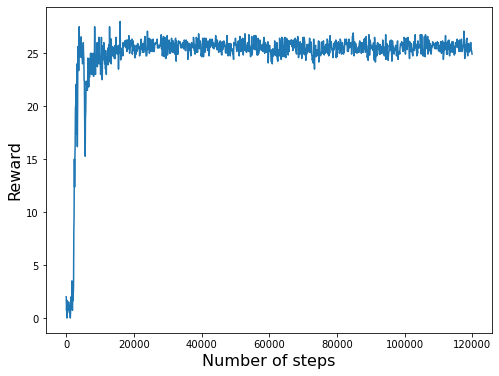

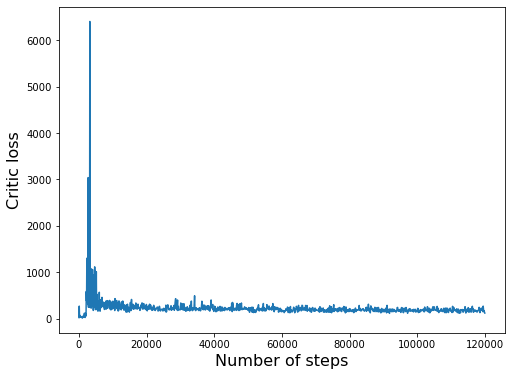

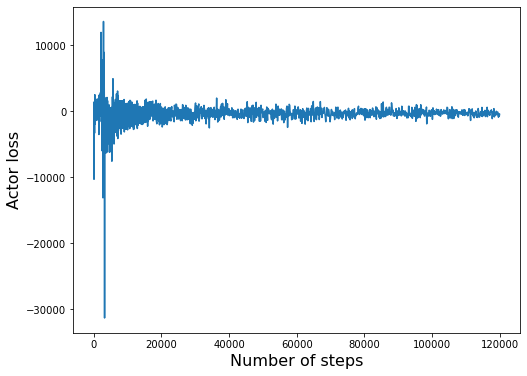

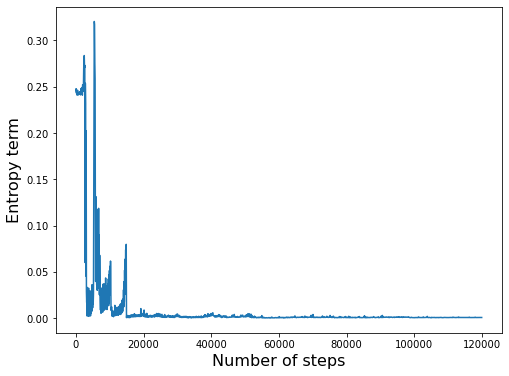

In [242]:
plot_IMPALA_session(results, moving_average=False, average_window=10)

In [243]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 25.61


# Search for periodic peaks in the critic loss

In [179]:
threshold = 4000
mask = (baseline_loss > threshold)
non_zero = mask.nonzero()[0]
tolerance = 30
x_min = non_zero[0]
centers = []
clusters = []
cluster_elems = []
for i in range(len(non_zero)):
    if (non_zero[i] - x_min) <= tolerance:
        cluster_elems.append(non_zero[i])
    else:
        clusters.append(cluster_elems)
        centers.append(np.mean(cluster_elems))
        cluster_elems = [non_zero[i]]
        x_min = non_zero[i]
        
centers = np.array(centers)
print("Clusters: \n", clusters, '\n')
print("Centers: \n", centers)

Clusters: 
 [[31, 32, 34, 37, 43, 49, 61], [67, 73, 79, 91, 97], [103, 130], [136, 142, 148, 154], [220, 226, 232, 238, 247, 250], [256, 265, 271, 277, 283], [289, 313], [322, 337], [355, 361, 367, 373, 385], [391, 403, 406], [470]] 

Centers: 
 [ 41.   81.4 116.5 145.  235.5 270.4 301.  329.5 368.2 400.  470. ]


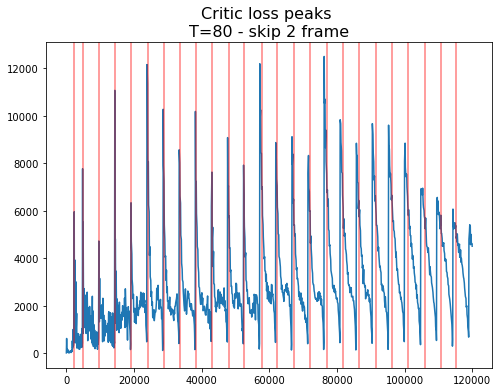

In [157]:
plt.figure(figsize = (8,6))
plt.title("Critic loss peaks \nT=80 - skip 2 frame", fontsize=16)
plt.plot(steps, baseline_loss)
T = flags['unroll_length']
for c in centers:
    plt.axvline(steps[int(c)], color='r', alpha=0.5)

In [156]:
distances = centers[1:] - centers[:-1] # measured in number of updates
# mask out outliers
mean = distances.mean()
std = distances.std()
mask = np.abs(distances - mean) > 3*std
print("Distances between centers: ", distances)
print("Outlier: ", mask)
distances = distances[~mask]
print("Filtered distances: ", distances)
print("Mean distance: %.2f +/- %.2f"%(distances.mean(), distances.std()/np.sqrt(len(distances)) ))

Distances between centers:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Outlier:  [False False False False False False False False False False False False
 False False False False False False False False False False False False]
Filtered distances:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Mean distance: 42.44 +/- 1.20


T = 80 -> mean distance 81.10 <br>
T = 60 -> mean distance 65.10; 60 (outlier manually counted off)

### Other stuff

n:  0
0


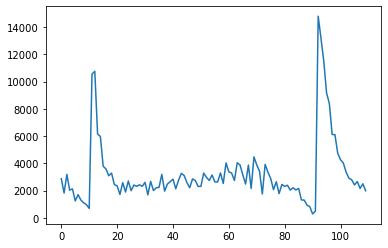

n:  1
79


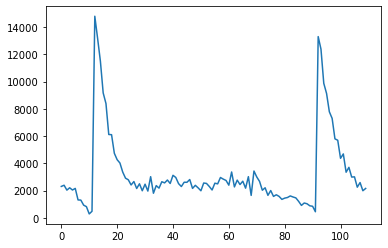

n:  2
0


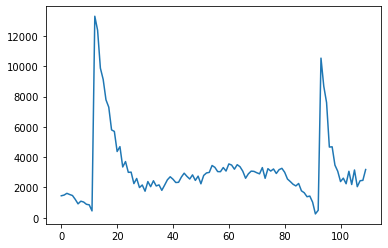

n:  3
0


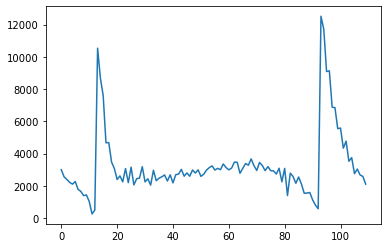

n:  4
0


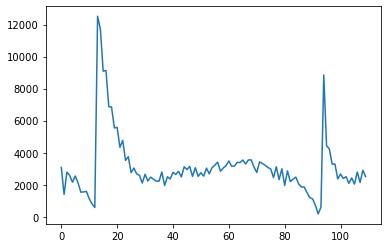

n:  5
0


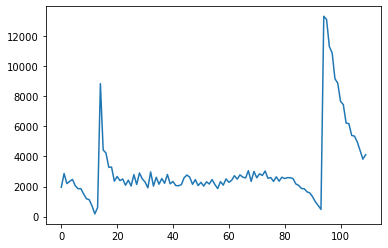

n:  6
0


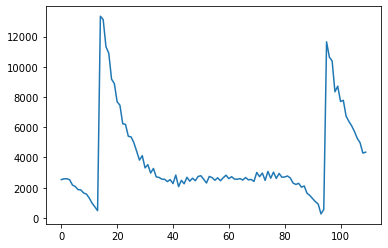

n:  7
-80


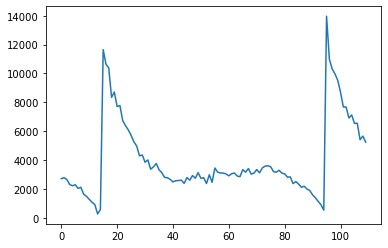

n:  8
80


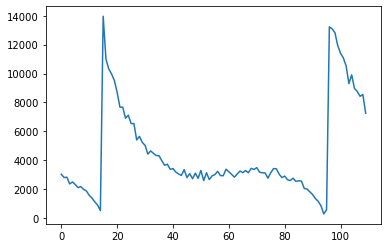

n:  9
0


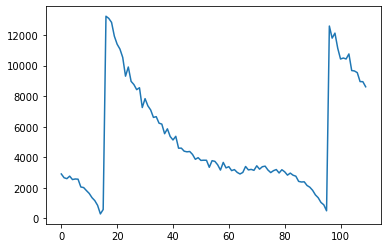

n:  10
1


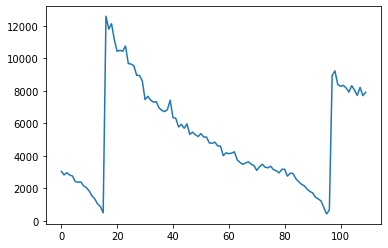

n:  11
-1


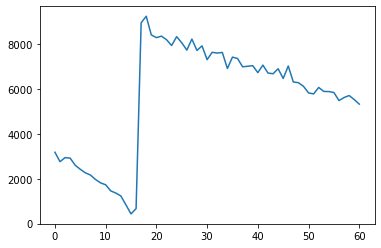

n:  12


ValueError: attempt to get argmax of an empty sequence

In [39]:
offset = 70
T = 80
N = 20
for n in range(N):
    print("n: ", n)
    v = baseline_loss[n*T+offset:(n+1)*T+30+offset]
    v1 = np.delete(v, np.argmax(v))
    max0 = np.argmax(v) + n*60
    max1 = np.argmax(v1) + n*60
    print(max1-max0)
    plt.plot(v)
    plt.show()

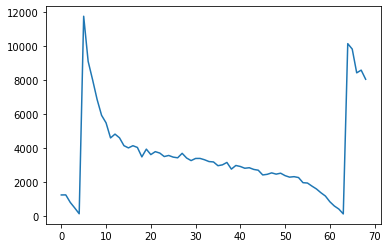

In [123]:
v1 = np.delete(v, np.argmax(v))
plt.plot(v1)

In [124]:
max0 = np.argmax(v)
max1 = np.argmax(v1)
print(max1, max0)

5 5


In [19]:
steps[max1] - steps[max0]

6120

In [40]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

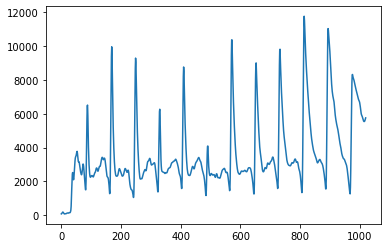

In [46]:
v = smooth(baseline_loss)
plt.plot(v)

In [42]:
from scipy.signal import argrelextrema

# for local maxima
maxima = argrelextrema(v, np.greater)[0]
maxima = maxima[1:]
maxima

array([ 14,  20,  27,  38,  53,  59,  73,  88, 102, 118, 129, 137, 144,
       169, 195, 214, 224, 249, 268, 280, 296, 312, 330, 351, 383, 410,
       440, 461, 491, 503, 511, 521, 527, 546, 555, 572, 605, 615, 630,
       653, 683, 692, 709, 733, 774, 784, 791, 814, 866, 894, 976])

In [43]:
maxima[1:] - maxima[:-1]

array([ 6,  7, 11, 15,  6, 14, 15, 14, 16, 11,  8,  7, 25, 26, 19, 10, 25,
       19, 12, 16, 16, 18, 21, 32, 27, 30, 21, 30, 12,  8, 10,  6, 19,  9,
       17, 33, 10, 15, 23, 30,  9, 17, 24, 41, 10,  7, 23, 52, 28, 82])

In [17]:
steps[maxima[1:]] - steps[maxima[:-1]]

array([ 780, 1980,  900, 1440, 1620,  780,  420,  240, 1080,  660,  540,
       1440,  420,  600,  480, 1080, 1560, 5280, 6900, 7440])

In [130]:
3480+3720

7200

In [50]:
6240/60

104.0

In [52]:
7020/60

117.0

In [53]:
7140/60

119.0

In [51]:
7200/60

120.0

In [54]:
120/24

5.0

We are not counting the batch size into the steps... 

## Comments

Both Adam and RMSprop show oscillations in the actor and critic losses even after convergence to the optimal policy by the agent.

Removing gradient clipping we also get it somehow.

In [210]:
import torch

In [214]:
d = torch.load("%s/%s/%s"%(load_dir,xpid,"vtrace.tar"))
d.keys()

dict_keys(['discounts', 'rewards', 'baseline', 'bootstrap_value', 'vs'])

In [213]:
d['discounts']

tensor([0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.0000, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900],
       device='cuda:0')

In [215]:
d['rewards']

tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [216]:
d['baseline']

tensor([9.0424, 9.0715, 9.0644, 9.3275, 9.3256, 9.3337, 9.3456, 9.3707, 9.4104,
        8.9678, 8.9729, 8.9768, 8.9707, 8.9636, 8.9645, 8.9925, 9.0220, 9.0062,
        9.2033, 9.2033, 9.2053, 9.2061, 9.2057, 9.2078, 9.2285, 9.2601, 9.2857,
        9.0885, 9.0860, 9.0992, 9.1316, 9.1183, 8.9987, 8.9968, 9.0020, 9.0005,
        9.0097, 9.0300, 9.0847, 9.0419, 9.0263, 9.0288, 9.0312, 9.0328, 9.0377,
        9.0615, 9.0835, 9.1124, 9.0175, 9.0160, 9.0186, 9.0150, 9.0185, 9.0155,
        9.0229, 9.0520, 9.0865, 8.7450, 8.7478, 8.7480, 8.7439, 8.7465, 8.7416,
        8.7457, 8.7510, 8.7568, 8.7667, 8.7868, 8.8208, 8.9269, 8.9337, 8.9373,
        8.9370, 8.9381, 8.9472, 9.0590, 9.0590, 9.0590, 9.0590, 9.0590],
       device='cuda:0', requires_grad=True)

In [217]:
d['bootstrap_value']

tensor(9.0590, device='cuda:0', requires_grad=True)

In [218]:
d['vs']

tensor([6.8604e+00, 6.9297e+00, 6.9997e+00, 6.0603e+00, 6.1215e+00, 6.1833e+00,
        6.2458e+00, 6.2177e+00, 6.2805e+00, 5.3338e+00, 5.3877e+00, 5.4421e+00,
        5.4971e+00, 5.5526e+00, 5.6087e+00, 5.6654e+00, 5.7226e+00, 5.7804e+00,
        4.7584e+00, 4.7499e+00, 4.7392e+00, 4.7871e+00, 4.8355e+00, 4.8843e+00,
        4.9336e+00, 4.9835e+00, 5.0338e+00, 4.0746e+00, 4.1157e+00, 4.1573e+00,
        4.1993e+00, 4.2417e+00, 3.2745e+00, 3.3075e+00, 3.3409e+00, 3.3746e+00,
        3.4087e+00, 3.4431e+00, 3.4779e+00, 3.5130e+00, 2.5384e+00, 2.5641e+00,
        2.5900e+00, 2.6161e+00, 2.6425e+00, 2.6692e+00, 2.6962e+00, 2.7234e+00,
        1.7408e+00, 1.7584e+00, 1.7762e+00, 1.7941e+00, 1.8122e+00, 1.8305e+00,
        1.8490e+00, 1.8676e+00, 1.8865e+00, 8.9545e-01, 9.0450e-01, 9.1362e-01,
        9.2284e-01, 9.3217e-01, 9.4158e-01, 9.5109e-01, 9.6068e-01, 9.7039e-01,
        9.8019e-01, 9.9005e-01, 1.0000e+00, 3.7193e-05, 2.3842e-05, 2.4796e-05,
        2.0981e-05, 2.0981e-05, 0.0000e+